# Example of reading tracker Trees into a pandas data frame for Python analysis

### First import the necessary modules

In [1]:
import sys,os
sys.path.append(os.environ["JUPYROOT"]) # where JUPYROOT is path to root e.g. /usr/local/Cellar/root/6.18.04/lib/root
# for Python3 install root_numpy with "python3 -m pip install --user root_numpy"
import root_numpy # see http://scikit-hep.org/root_numpy/install.html  
# for Python3 install root_pandas with "python3 -m pip install --user root_pandas"
from root_pandas import read_root # see https://github.com/scikit-hep/root_pandas 

Welcome to JupyROOT 6.18/04


## Read in the Trees into a pandas data frame

### As we have two new Tress now, QualityTracks and QualityVertices, we need to specify which one to open 

In [2]:
data = read_root('DATA/Trees/60h_all_quality_tracks.root', 'QualityTracks')

### Get a quick glimpse of data (head and tail)

In [3]:
data

,runNum,subRunNum,eventNum,islandNum,trackMomentum,trackMomentumX,trackMomentumY,trackMomentumZ,trackMomentumUnc,decayVertexPosX,...,nUHits,nVHits,missedLayersFrac,minDriftTime,maxDriftTime,maxResidual,extrapolatedDistance,passCandidateQuality,passTrackQuality,passVertexQuality
0,15921,16,3,19,1712.727539,512.199341,8.262894,-1634.325317,57.717182,-7101.560059,...,6,6,0.000000,8.431014,51.623920,0.175800,0.016023,True,True,False
1,15921,16,3,32,1488.187256,353.067383,-30.994150,-1445.366455,10.332804,-7042.594238,...,10,9,0.095238,10.963304,59.077667,0.227000,0.014446,True,True,True
2,15921,16,3,33,538.117676,245.239731,0.646138,-478.986115,6.021589,-7136.965820,...,6,6,0.000000,13.241358,56.658409,0.092637,0.007120,True,True,True
3,15921,16,3,53,1140.483154,352.003021,-13.173466,-1084.722168,12.152552,-7117.277832,...,6,8,0.125000,5.510454,49.254845,0.228639,0.011527,True,True,True
4,15921,16,3,55,1769.361206,412.681458,-22.436968,-1720.415527,12.600249,-6987.538086,...,12,8,0.090909,13.612383,55.279339,0.269051,0.020338,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35143514,15984,488,153,196,1765.684814,1687.950317,-3.654095,518.125000,27.297100,-797.272461,...,7,7,0.125000,14.265033,59.629528,0.208270,0.018495,True,True,False
35143515,15984,488,153,212,1176.171509,1128.292969,9.859795,332.019653,14.607284,-757.449280,...,7,5,0.250000,13.343901,55.259670,0.115285,0.011820,True,True,True
35143516,15984,488,153,224,2008.930420,1987.400513,1.355163,293.324249,8.468109,-1099.747681,...,13,13,0.187500,7.565221,57.660664,0.494180,0.015575,True,True,False
35143517,15984,488,153,243,2624.717041,2601.681885,-17.822609,346.516266,15.955649,-2334.005859,...,8,12,0.230769,10.417839,59.483936,0.264356,0.031328,True,True,False


# Now let's plot something!

## First get track time and vertical momentum from data (selecting by column name, which is the NTuple name)
## We can now select variables directly from the table, e.g.

In [30]:
py = data['trackMomentumY'] # select by column name 
t = data['trackT0']*1e-3  # ns -> us 
print("We have", "{:.2e}".format(len(t)), "tracks in this array!")

We have 3.51e+07 tracks in this array!


## Make a 2D histogram wth 100 X by 100 Y bins with 1M tracks

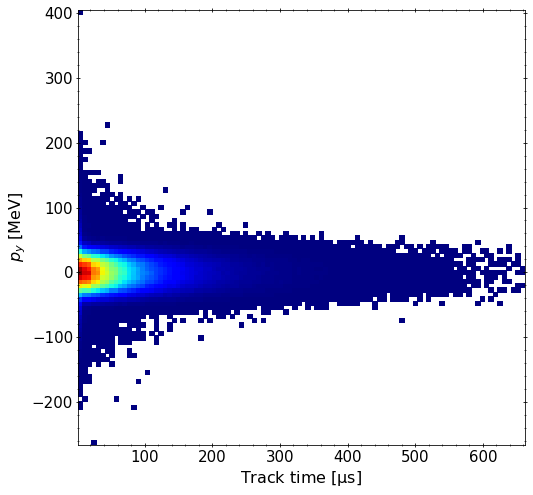

In [27]:
import matplotlib.pyplot as plt # import plotting module
import numpy as np # import fast array and maths module
fig, ax = plt.subplots()
h, x, y, image = plt.hist2d(t[0:int(1e6)], py[0:int(1e6)], bins=(100, 100), cmap=plt.cm.jet, cmin=1) #add 2D histo on top
fig.set_size_inches(8, 8)

font_size=16 # set a global constans
# Pretify plot (can be part of a function to avoid copying code)
ax.set_xlabel(xlabel=r"Track time [$\mathrm{\mu}$s]", fontsize=font_size)
ax.set_ylabel(ylabel=r"$p_y$ [MeV]", fontsize=font_size)
ax.tick_params(axis='x', which='both', bottom=True, top=True, direction='inout')
ax.tick_params(axis='y', which='both', left=True, right=True, direction='inout')
ax.minorticks_on()
plt.xticks(fontsize=font_size-1)
plt.yticks(fontsize=font_size-1)
plt.show()

## Wait?! What about some statisics?

### Let's define some helper functions

In [31]:
# Put some statisitcs for momentum
# define functions to use later 
from scipy import stats 
def stats5(data):
    '''
    Input is a 1D array 
    '''
    N = len(py)
    mean = np.mean(py)
    meanE = stats.sem(py)
    sd = np.std(py)
    sdE = np.sqrt(sd**2/ (2*N) ) # 
    return N, mean, meanE, sd, sdE

# define a legedn function with good formatting and precision of 4 decimal places
def legend5(N, mean, meanE, sd, sdE, prec=4):
    '''
    form a string from 5 stats inputs with given precision
    '''
    meanS=r"$\mathrm{\mu}$"
    sigmaS=r"$\sigma$"
    # form raw string with Latex
    legend = "N={0:d}".format(N)+"\n"+str(meanS)+"={0:.{prec}f}({1:d})\n".format(mean, int(round(meanE*10**prec)), prec=prec)+str(sigmaS)+"={0:.{prec}f}({1:d})".format(sd, int(round(sdE*10**prec)), prec=prec)
    return legend

def textL(ax, x, y, legend, font_size=14):
    '''
    return a good formatted plot legend
    '''
    return ax.text(x, y, str(legend),  fontsize=font_size, transform=ax.transAxes, horizontalalignment='center', verticalalignment='center')

# Get nicely-formatted stats and put on the plot
N, mean, meanE, sd, sdE = stats5(py)
legend_py = legend5(N, mean, meanE, sd, sdE)
textL(ax, 1.32, 1.15, r"$p_y$ [MeV]:"+"\n"+str(legend_py), font_size=15)
plt.show()

### Now, let's create a cut on time of $\mu s$

In [32]:
time_cut = (t > 30)  # define a time_cut with time > 30 us

## Create a new data frame where all entries have time above $30 \mu s$

In [33]:
data_above30us=data[time_cut] 

In [40]:
print("Our time cut removed", "{:.2e}".format(data.shape[0] - data_above30us.shape[0]), "tracks")

Our time cut removed 1.24e+07 tracks


### Also useful to check types of columns (i.e. Ntuples) in our data

In [4]:
data_above30us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35143519 entries, 0 to 35143518
Data columns (total 35 columns):
runNum                  int32
subRunNum               int32
eventNum                int32
islandNum               int32
trackMomentum           float32
trackMomentumX          float32
trackMomentumY          float32
trackMomentumZ          float32
trackMomentumUnc        float32
decayVertexPosX         float32
decayVertexPosY         float32
decayVertexPosZ         float32
decayVertexMomX         float32
decayVertexMomY         float32
decayVertexMomZ         float32
decayVertexUncR         float32
decayVertexUncY         float32
decayVertexUncPR        float32
decayVertexUncPY        float32
trackT0                 float32
decayTime               float32
hitVolume               bool
trackPValue             float32
station                 int32
nHits                   int32
nUHits                  int32
nVHits                  int32
missedLayersFrac        float32
minDrift

### Happy tracking! 🤠